# **K-Nearest Neighbors Explained**

## **Introduction**

K-Nearest Neighbors (K-NN) is a very simple algorithm and likely among the first encountered by people studying machine learning. You simply find the *k* nearest data points and use their labels to predict the labels of new data points. Here, *k* is some positive integer less than or equal to the number of data points. The optimal *k* is typically chosen through cross-validation. Lower values of *k* gives a more flexible model, while higher values of *k* give a less flexible model. The optimal value of *k* depends on how flexible the data generating process is and how much data you have.

K-NN is a non-paramteric model. It makes no assumption about the model underlying the data generation process. It does not learn any parameters, as opposed to a linear model like ordinary least squares regression or logistic regression which learn coefficients in a linear model form. This gives it some advantages and disadvantages over more structured models.

### **Strengths**

* Makes no assumption about the data generating process so it can fit flexible models.

* "Training" the model is as fast as saving the data because it does not need to estimate parameters.

* It is simple to explain and implement.

### **Weaknesses**

* Makes no assumption about the data generating process, which can lead to overfitting without sufficient training observations or too small a **k** value.

* The data set must be stored where the model can access it, which can use up a large amount of memory with large data sets.

* Making predictions is relatively slow compared to parametric models because it needs to compute the distances to the training data points, sort them, retrieve the *k* closest points, and then make a prediction. 

* K-NN is a victim of the curse of dimensionality; it does not perform well with high dimensions where data points become very spread out.

* Works best when observations are close together in the feature space.

* K-NN is sensitive to outliers.

Some of the above strengths and weaknesses are two sides of the same coin, such as its flexibility and speed of "training" but high use of memory and slow predictive speed. With that being said, this is usually among the first two algorithms I try on prediction problems that look like they may be very non-linear when I have sufficient data points. If there are many dimensions, I generally use a dimensionality reduction technique, like principal components analysis, to get a lower dimensional space prior to modeling. 

Summarizing the strengths and weaknesses into a decision process for using K-NN, it is a good choice for non-linear functions with many observations and a poor choice when there is not much data and the data generating function doesn't require much flexibility.

## **The K-NN Algorithm**

The K-NN algorithm is very simple and the first five steps are the same for both classification and regression.

1. **Select *k** and the Weighting Method*

Choose a value of *k*, which is the number of nearest neighbors to retreive for making predictions. The two choices of weighting method are **uniform** and **inverse distance weighting**. With **uniform weighting**, you do not take into account the distance from the new data point from it's *k* nearest neighbors. They all have equal influence over the prediction. With **inverse distance weighting**, you assign high value to the closer training examples.

You will generally end up trying various values of *k* and weighting methods in cross-validation and go with the *k* and weighting method with the lowest cross-validation loss.

2. **"Train" the K-NN Model**

As mentioned above, there are no parameters to estimate in this model. You simply save the training data for making predictions.

3. **Pass Data for Prediction**

Simply pass your model a new data point to predict.

4. **Calculating the Distance**

Up until this point, I have said "nearest" without defining what I meant by that. There are multiple distance metrics and I will not cover them all. The one I will cover is the most common; Euclidean distance. Euclidean distance is simply the length of the line segment connecting two points. The formula for Euclidean distance between two points is below:

### $\text{Euclidean Distance}(\text{x}^{*}, \text{x}) = \sqrt{\Sigma^{m}_{i}(\text{x}^{*}_{i} - \text{x}_{i})^{2})}$

where $\text{x}^{*}$ is the feature vector of the new data point, $\text{x}$ is the feature vector of a single training data point, and $m$ is the number of features used for prediction. 

You calculate the distance, using your chosen metric, of the new data point from each of the training data points and temporarily save the distances for the next step.

5. **Finding the K-Nearest Neighbors**

Once you know the distances of each training observation from your new data point, you sort the data points by their distance from the new data point. You then select the *k* data points with the smallest distances. I used **quicksort** for sorting the distances in my implementation.

You now have found the *k* nearest neighbors in the training data to your new data point and can use their labels for prediction.

6. **Prediction**

Here is where the steps of the algorithm diverge for classification and regression.

**Regression**

For regression, you average the labels of the *k* nearest training data points and use that for the prediction of the newest data point. If using **uniform weighting**, this is the simple average of the labels. If using **inverse distance weighting**, you calculate the weighted average of the training labels, weighting the $i^{th}$ nearest neighbor's label by $\frac{1}{\text{distance}_{i}}$. This gives closer points more influence over the predicted label. If the distance is 0, the weight will be undefined because you cannot divide by 0. To get around this in my implementation, I give the option of adding a small value to the distance. This still results in a point with 0 distance having a very large weight on the predicted label.

**Classification**

For classification, you use the majority vote (for binary classification) or plurality vote (for multi-class) of the training labels to predict the new label. To avoid 50-50 vote splits, it is good to use an odd number for *k*. The proportion of votes for a class can be interpreted as the probability of the new data point belonging to that class. Like in the regression case, you can weight the votes of each of the *k* nearest neighbors by the inverse of their distance to give closer points more influence. 

## **Demonstration**

Now that we've covered how the algorithm works, I've simulated some data for a multi-class prediction problem and two regression problems to demonstrate how K-NN performs for simple problems with various values of *k* and weighting methods. Let's start with classification.

### **Classification Demonstration**

To demonstrate K-NN for classification, I simulated 100 data points from 3 classes each. Each class is paramaterized by its own bivariate normal distribution. The means of each class are different with the same covariance matrix. This is the ideal case for Linear Discriminant Analysis, but we are using that knowledge to plot the boundary of the Bayes Classifier.

First, we need to import

In [1]:
import os

path = os.sys.path[0].replace("\\test", "")
os.chdir(path)

import numpy as np
from KNearestNeighbors import KNNClassifier, KNNRegresser

In [18]:
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# Set a random seed for reproducibility.
np.random.seed(1)

mu_1 = [5.5, 3]
mu_2 = [-0.5, 4]
mu_3 = [3, -2]
sigmas = [2, 3]
class_1 = multivariate_normal(mean=mu_1, cov=sigmas)
class_2 = multivariate_normal(mean=mu_2, cov=sigmas)
class_3 = multivariate_normal(mean=mu_3, cov=sigmas)

def max_prob(x):
    """This function returns the class based on the """
    return np.argmax([class_1.pdf(x), class_2.pdf(x), class_3.pdf(x)], axis=0) + 1

# Set the number of data points in each class.
size = 100
# Create the 3 bivariate normal distributions that will belong to 1 of 3
# classes.
X_1 = class_1.rvs(size)
               
X_2 = class_2.rvs(size)

X_3 = class_3.rvs(size)

# Combine them into a single numpy array.
X = np.append(X_1, X_2, axis=0)
X = np.append(X, X_3, axis=0)
# Forget them to free memory.
del X_1
del X_2 
del X_3

# Create labels for each of the 3 classes.
y_1 = np.repeat(1, repeats=size)
y_2 = np.repeat(2, repeats=size)
y_3 = np.repeat(3, repeats=size)
# Append them all into 1 array.
y = np.append(y_1, y_2)
y = np.append(y, y_3)
# Forget them to free memory.
del y_1
del y_2 
del y_3

# Create arrays with 50 equidistant points along each dimension of the feature
# space.
detail = 75
x_1 = np.linspace(np.min(np.transpose(X)[0]), np.max(np.transpose(X)[0]), detail)
x_2 = np.linspace(np.min(np.transpose(X)[1]), np.max(np.transpose(X)[1]), detail)

# Create pairs of values covering the feature space and append them to a list.
feature_space = []
for i in x_1:
    for j in x_2:
        feature_space.append((i, j))
# Convert the list to a numpy array.       
feature_space = np.array(feature_space)

# Create a dictionary to map point labels to colors.
point_color_dict = {1: "blue",
                    2: "red",
                    3: "green"}
# Create a dictionary to map decision space labels to colors.
background_color_dict = {1: "lightblue",
                         2: "mistyrose",
                         3: "lightgreen"}

# Map classes to colors for the scatter plot.
point_colors = [point_color_dict[y_i] for y_i in y]

true_boundary = [background_color_dict[x] for x in max_prob(feature_space)]

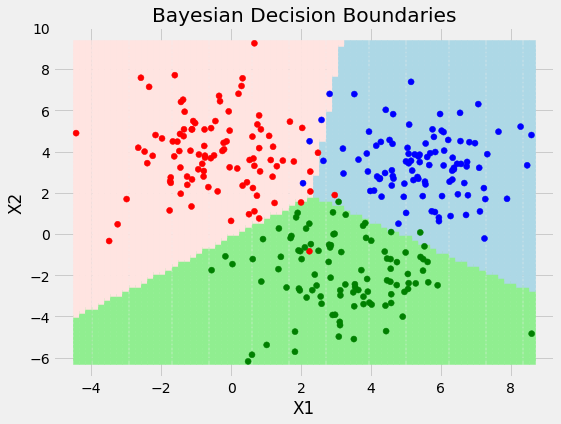

In [16]:
# Plot the data versus the Bayes Decision Boundary.
plt.style.use('fivethirtyeight')

plt.figure(figsize=(8, 6))
plt.scatter(np.transpose(feature_space)[0], np.transpose(feature_space)[1], 
                          color=true_boundary, marker=",")
plt.scatter(np.transpose(X)[0], np.transpose(X)[1], color=point_colors)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Bayesian Decision Boundaries")
plt.show()

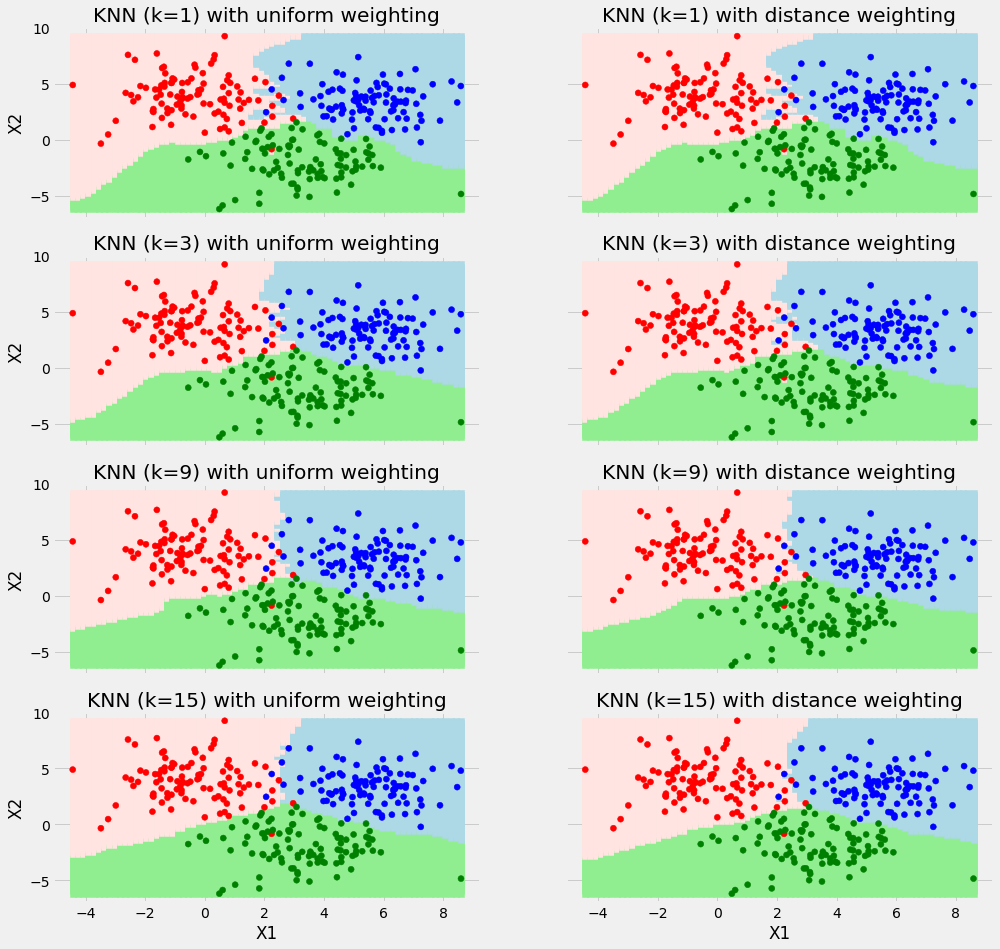

In [17]:
# Create a dictionary to hold the hyperparamters and color codings
# of multiple K-NN Classifiers
decision_space_dict = dict()
# Create a key that will increase by 1 after each model
key_counter = 0
# Create a list of k values to try.
ks_to_try = [1, 3, 9, 15]
# For each k in k values to try...
for k in ks_to_try:
    # For each weight...
    for weights in ["uniform", "distance"]:
        # Instantiate a temporary KNNClassifer object with the k and weight.
        temp_knn = KNNClassifier(k=k, weights=weights)
        # "Fit" it to the data.
        temp_knn.fit(X, y)
        # Get predicted classes of each point in the feature space.
        temp_preds = temp_knn.predict(feature_space)
        # Store a tuple of the hyperparameters and feature space color labels in
        # the dictionary.
        decision_space_dict[key_counter] = [(str(k), weights), 
                                            [background_color_dict[y_i] for y_i in temp_preds]]
        # Increment the key by 1.
        key_counter += 1

nrows, ncols = len(ks_to_try), 2
fig, axs = plt.subplots(nrows, ncols, figsize=(15,15))

key_counter = 0
for i in range(nrows):
    for j in range(ncols):
        axs[i, j].scatter(np.transpose(feature_space)[0], np.transpose(feature_space)[1], 
                          color=decision_space_dict[key_counter][1], marker=",")
        axs[i, j].scatter(np.transpose(X)[0], np.transpose(X)[1], color=point_colors)
        axs[i, j].set_title(f"KNN (k={decision_space_dict[key_counter][0][0]}) with {decision_space_dict[key_counter][0][1]} weighting")
        key_counter += 1

for ax in axs.flat:
    ax.set(xlabel='X1', ylabel='X2')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

### **Regression Demonstration**

#### **Non-Linear Function with Many Observations**

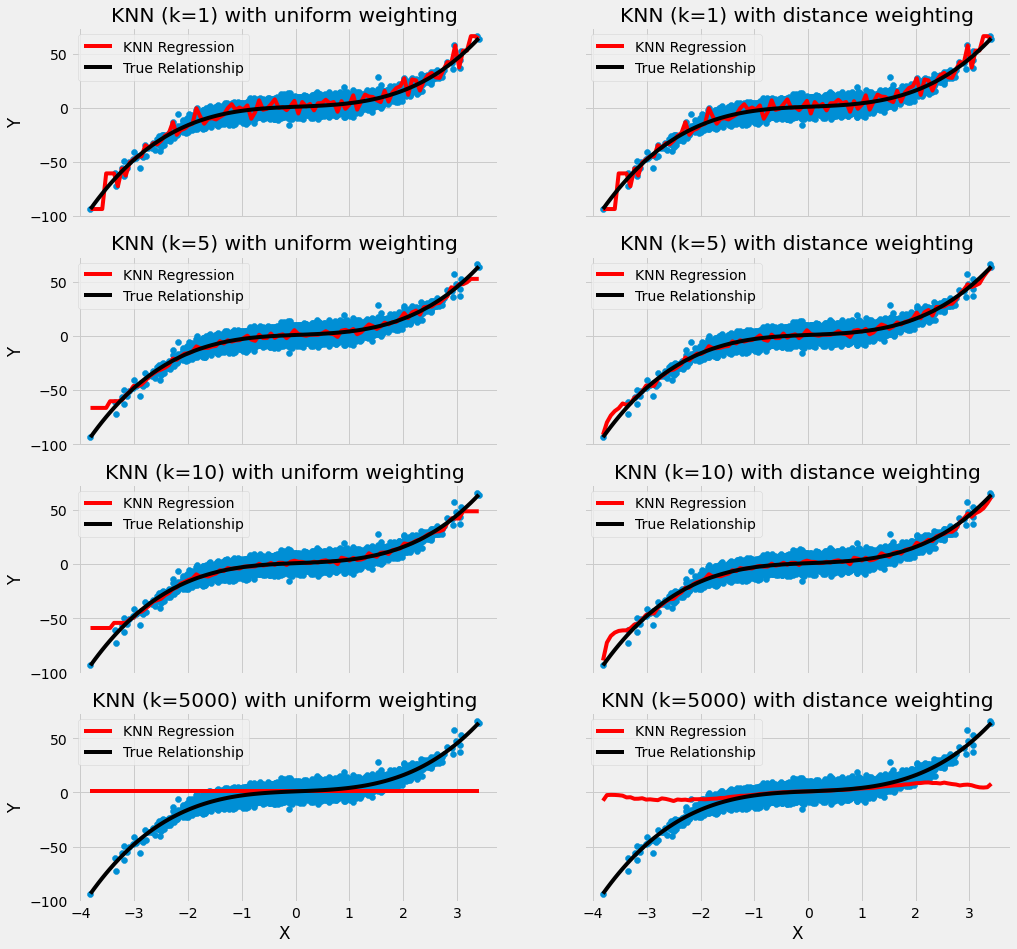

In [4]:
def population_curve(x):
    """This function defines the true relationship
    between x and y and is a cubic function."""
    return  1 + 2*x - 0.25*x**2 + 1.5*x**3

# Set the number of datapoints to generate.
size = 5000
# Generate a sample from a Standard Normal Distribution.
X = np.random.normal(loc=0, scale=1, size=size)
# Generate corresponding y values with some normal random error
# added.
y = population_curve(X) + np.random.normal(loc=0, scale=4, size=size)
# Reshape X to be a column vector.
X = X.reshape(-1,1)

# Create 100 equidistant point between the minimum and maximum value of
x_space = np.linspace(np.min(X), np.max(X), 100).reshape(-1, 1)
true_y = [population_curve(x) for x in x_space.flatten()]

# Create a dictionary to hold the hyperparamters and color codings
# of multiple KNN Regressers.
prediction_dict = dict()
# Create a key that will increase by 1 after each model
key_counter = 0
# Create a list of k values to try.
ks_to_try = [1, 5, 10, size]
# For each k in k values to try...
for k in ks_to_try:
    # For each weight...
    for weights in ["uniform", "distance"]:
        # Instantiate a temporary KNNClassifer object with the k and weight.
        temp_knn = KNNRegresser(k=k, weights=weights)
        # "Fit" it to the data.
        temp_knn.fit(X, y)
        # Get predicted classes of each point in the feature space.
        temp_preds = temp_knn.predict(x_space, smoothing=0.01)
        # Store a tuple of the hyperparameters and feature space color labels in
        # the dictionary.
        prediction_dict[key_counter] = [(str(k), weights), 
                                        temp_preds]
        # Increment the key by 1.
        key_counter += 1

nrows, ncols = len(ks_to_try), 2


fig, axs = plt.subplots(nrows, ncols, figsize=(15,15))

key_counter = 0
for i in range(nrows):
    for j in range(ncols):
        axs[i, j].scatter(X, y)
        axs[i, j].plot(x_space, prediction_dict[key_counter][1], 
                       color="red", label="KNN Regression")
        axs[i, j].plot(x_space, true_y, 
                       color="black", label="True Relationship")
        axs[i, j].set_title(f"KNN (k={prediction_dict[key_counter][0][0]}) with {prediction_dict[key_counter][0][1]} weighting")
        axs[i, j].legend()
        key_counter += 1

for ax in axs.flat:
    ax.set(xlabel='X', ylabel='Y')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

#### **Linear Function with Few Observations**

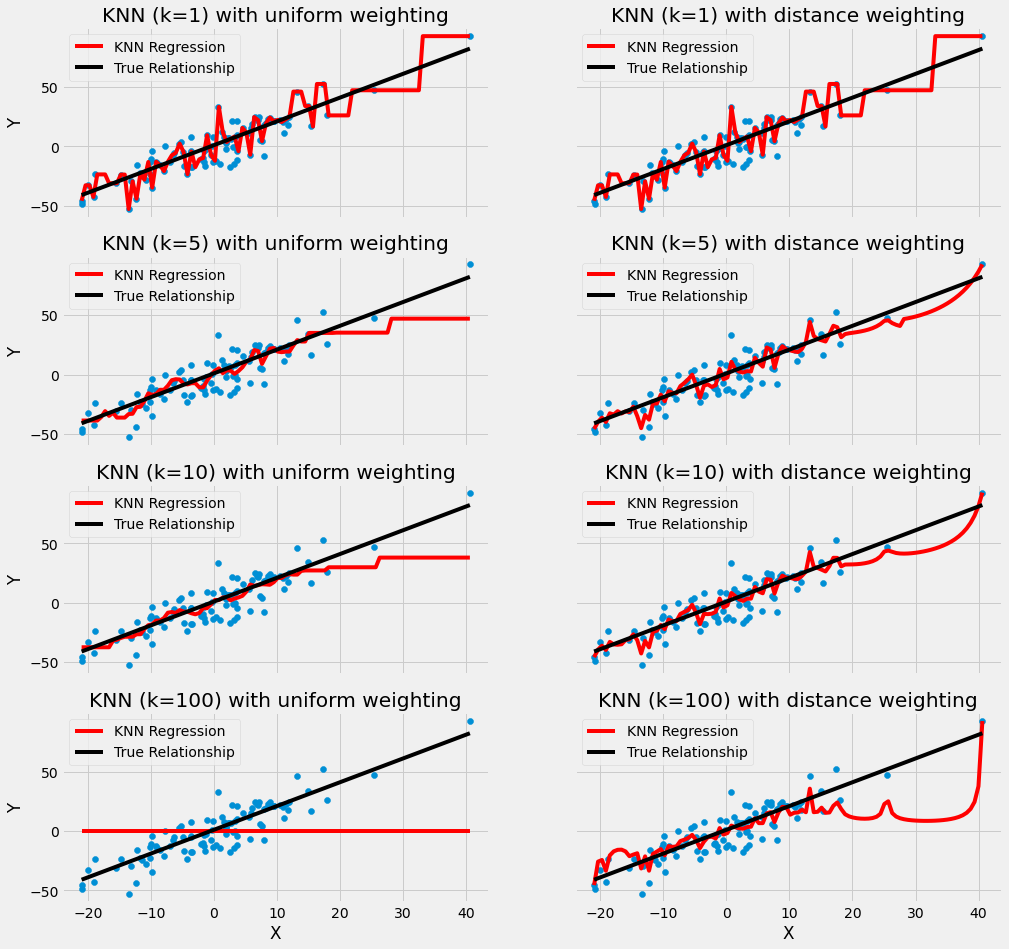

In [5]:
def population_curve(x):
    """This function defines the true relationship
    between x and y and is a cubic function."""
    return  1 + 2*x

# Set the number of datapoints to generate.
size = 100
# Generate a sample from a Standard Normal Distribution.
X = np.random.normal(loc=0, scale=10, size=size)
# Generate corresponding y values with some normal random error
# added.
y = population_curve(X) + np.random.normal(loc=0, scale=10, size=size)
# Reshape X to be a column vector.
X = X.reshape(-1,1)

# Create 100 equidistant point between the minimum and maximum value of
x_space = np.linspace(np.min(X), np.max(X), 100).reshape(-1, 1)
true_y = [population_curve(x) for x in x_space.flatten()]

# Create a dictionary to hold the hyperparamters and color codings
# of multiple KNN Regressers.
prediction_dict = dict()
# Create a key that will increase by 1 after each model
key_counter = 0
# Create a list of k values to try.
ks_to_try = [1, 5, 10, size]
# For each k in k values to try...
for k in ks_to_try:
    # For each weight...
    for weights in ["uniform", "distance"]:
        # Instantiate a temporary KNNClassifer object with the k and weight.
        temp_knn = KNNRegresser(k=k, weights=weights)
        # "Fit" it to the data.
        temp_knn.fit(X, y)
        # Get predicted classes of each point in the feature space.
        temp_preds = temp_knn.predict(x_space, smoothing=0.001)
        # Store a tuple of the hyperparameters and feature space color labels in
        # the dictionary.
        prediction_dict[key_counter] = [(str(k), weights), 
                                        temp_preds]
        # Increment the key by 1.
        key_counter += 1

nrows, ncols = len(ks_to_try), 2
fig, axs = plt.subplots(nrows, ncols, figsize=(15,15))

key_counter = 0
for i in range(nrows):
    for j in range(ncols):
        axs[i, j].scatter(X, y)
        axs[i, j].plot(x_space, prediction_dict[key_counter][1], 
                       color="red", label="KNN Regression")
        axs[i, j].plot(x_space, true_y, 
                       color="black", label="True Relationship")
        axs[i, j].set_title(f"KNN (k={prediction_dict[key_counter][0][0]}) with {prediction_dict[key_counter][0][1]} weighting")
        axs[i, j].legend()
        key_counter += 1

for ax in axs.flat:
    ax.set(xlabel='X', ylabel='Y')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()